In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import math
from sklearn.cluster import DBSCAN

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/ubuntu/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [21]:
df = pd.read_csv('./VBOX _supervised_scaled_reduced_and_labels.csv')

In [22]:
df['y'].value_counts()

0.0    4926
1.0    2295
Name: y, dtype: int64

In [23]:
df_clustering = df.drop(['y'],axis=1)
df_clustering.head()

,time,sats,long,lat,velocity,heading,height,vert-vel,GPS-Longacc,turn-radius,Centre-Line-Deviation,AbsHead,Longacc,Latacc,rel-height
0,0.000000,0.78,0.956592,0.218346,0.0,0.0,0.191770,0.488462,0.333935,0.0,0.776476,0.992333,0.930492,0.906582,0.017973
1,0.001245,0.80,0.956592,0.218342,0.0,0.0,0.189038,0.488462,0.333935,0.0,0.776476,0.992333,0.930492,0.906582,0.017973
2,0.001324,0.80,0.956591,0.218343,0.0,0.0,0.189927,0.488462,0.333935,0.0,0.776476,0.992333,0.930492,0.906582,0.017973
3,0.001404,0.80,0.956591,0.218344,0.0,0.0,0.190914,0.488462,0.333935,0.0,0.776476,0.992333,0.930492,0.906582,0.017973
4,0.001483,0.80,0.956590,0.218345,0.0,0.0,0.191408,0.488462,0.333935,0.0,0.776476,0.992333,0.930492,0.906582,0.017973


In [29]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1, min_samples=15).fit(df_clustering)
print(clustering.labels_.max())
print(clustering.labels_.min())

0
0


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(df['y'], clustering.labels_)
print(confusion_matrix)

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

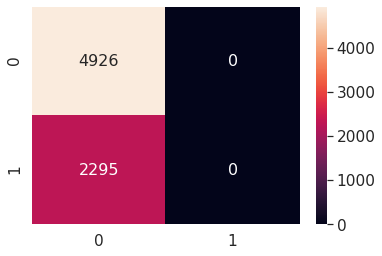

In [12]:
df_cm = pd.DataFrame(confusion_matrix)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size

plt.show()

In [13]:
from sklearn.metrics import classification_report
print(classification_report(df['y'], clustering.labels_))

              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81      4926
         1.0       0.00      0.00      0.00      2295

    accuracy                           0.68      7221
   macro avg       0.34      0.50      0.41      7221
weighted avg       0.47      0.68      0.55      7221



/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df['y'], clustering.labels_)

0.317823016202742